$$Diego \space Castillo \space Reyes$$

<h1 align="center">Algoritmo de Deutsch-Jozsa pennylane</h1>
Crear el algoritmo de Deutsch-jozsa en Pennylane con matrices de densidad generalizadas

In [55]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# ask user for number of qubits
while True:
    nQubits = int(input("Ingrese el numero de qubits (n >= 2): "))
    if nQubits >= 2:
        break
    else:
        print("El numero de qubits debe ser mayor o igual a 2.")


# define the quantum device
dev = qml.device("default.qubit", wires=nQubits, shots = 1)

In [57]:
# define constant function
def constant(x):
    # f(x): {0, 1} -> {0, 1}
    return 0

In [58]:
#define balanced function
def balanced(x):
    # f(x): {0, 1} -> {1, 0}
    if x % 2 == 0:
        return 1
    if x % 2 == 1:
        return 0

In [59]:
# define de oracle 
def U(f, nQubits):
    # Calculate the size of the matrix
    dim = 2 ** nQubits
    # Initialize the matrix
    u = np.zeros((dim, dim))
    
    # Initialize the stride
    stride = 0
    for i in range(dim // 2):
        fx = f(i)
        # set the blocks of the matrix
        block = np.array([
            [1-fx, fx],
            [fx, 1-fx]
        ])
        # place the block in the matrix
        u[stride:stride + 2, stride:stride + 2] = block
        # update the stride
        stride += 2
        
    return u

# print(f"Balanceada: \n{U(balanced, 3)}")
# print(f"Constante: \n{U(constant, 3)}")

In [60]:
# define the quantum circuit
@qml.qnode(dev)
def circuit(U_f):
    qml.PauliX(nQubits - 1)
    # Aply hadamard to all qubits
    for i in range(nQubits):
        qml.Hadamard(i)

    qml.QubitUnitary(U_f, wires=[n for n in range(nQubits)]) # oracle

    # Aply hadamard to the first n-1 qubits
    for i in range(nQubits - 1):
        qml.Hadamard(i)
        
    return qml.sample(wires=range(nQubits - 1))

In [61]:
U_f = U(constant, nQubits)
# U_f = U(balanced, nQubits)

# Run the circuit
result = circuit(U_f)
print(f"Resultado de la medicion: {result}")

if np.all(result == 0):
    print("La funcion es constante")
else:
    print("La funcion es balanceada")

Resultado de la medicion: [0 0 0 0]
La funcion es constante


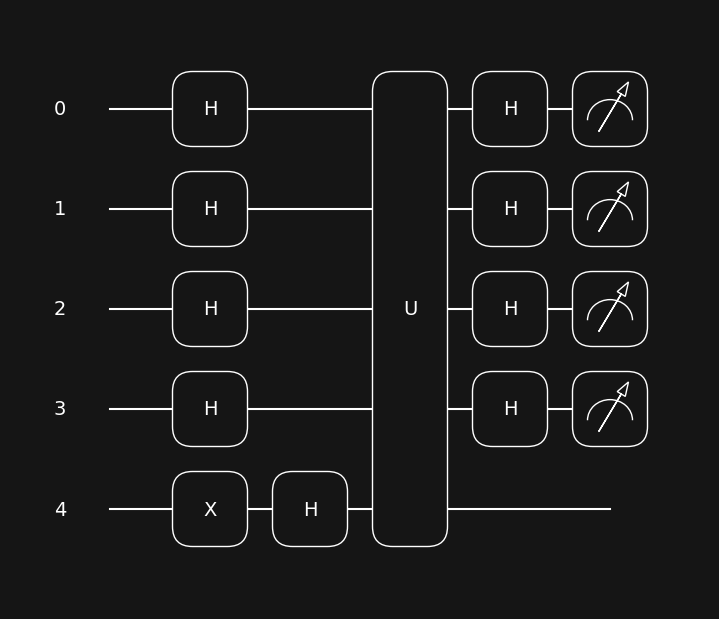

In [62]:
# Draw the circuit using matplotlib
qml.drawer.use_style("black_white_dark")
fig, ax = qml.draw_mpl(circuit)(U_f)
plt.show()